In [1]:
import pandas as pd
import csv
import us
import matplotlib # for testing
%matplotlib inline

## Set up newdx data frames

In [2]:
# A list of all the URLs to state and county newdx data sets
raw_newdx_urls = {
    2015: {"state":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_State_NewDX_2015.xlsx",
        "county":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_County_NewDX_2015.xlsx"},
    2014: {"state":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_State_NewDX_2014.xlsx",
        "county":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_County_NewDX_2014.xlsx"},
    2013: {"state":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_State_NewDX_2013.xlsx",
        "county":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_County_NewDX_2013.xlsx"},
    2012: {"state":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_State_NewDX_2012.xlsx",
        "county":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_County_NewDX_2012.xlsx"},
    2011: {"state":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_State_NewDX_2011.xlsx",
        "county":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_County_NewDX_2011.xlsx"},
    2010: {"state":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_State_NewDX_2010.xlsx",
        "county":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_County_NewDX_2010.xlsx"},
    2009: {"state":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_State_NewDX_2009.xlsx",
        "county":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_County_NewDX_2009.xlsx"},
    2008: {"state":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_State_NewDX_2008.xlsx",
        "county":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_County_NewDX_2008.xlsx"}
}

In [3]:
def make_raw_df(year, sc, dataset):
    """
    Returns a raw, uncleaned dataframe corresponding to year and state or county in either raw_newdx_urls or raw_prev_urls.
    year is a full four-digit year int, sc is the string "state" or "county", and dataset is the string "prev" or "newdx".
    """
    if dataset == "newdx":
        return pd.read_excel(raw_newdx_urls.get(year).get(sc), skiprows=2)
    elif dataset == "prev":
        if year == 2012:
            # 2012 is a special case where you should not skip any rows.
            return pd.read_excel(raw_prev_urls.get(year).get(sc), skiprows=0)
        else:
            return pd.read_excel(raw_prev_urls.get(year).get(sc), skiprows=2)
    else:
        return None

In [4]:
def omit_us_territories(countydf):
    """
    Takes a county data frame and returns a version of it that only includes the 50 U.S. states.
    This is a helper function for clean_newdx_dfs()
    """
    if 'GEO ID' in countydf.columns:
        countydf = countydf[countydf['GEO ID'].astype('int64') < 60000] # U.S. territories/non-states have geo IDs 60000 and above
    return countydf

In [5]:
# make_raw_df for all newdx data and store in newdx_dfs
def make_clean_newdx_dfs():
    """
    Makes and returns a dictionary of newdx data indexed by year and state/county.
    County data will have their U.S. territories removed.
    """
    newdx_dfs = {}
    for year in raw_newdx_urls.keys():
        # make the data frames
        # strip columns and set them to lower case
        newdx_dfs[year] = {"state": omit_us_territories(make_raw_df(year, 'state', 'newdx'))\
                                                   .rename(columns=lambda x: x.strip().lower()),
                       "county": omit_us_territories(make_raw_df(year, 'county', 'newdx'))\
                                                   .rename(columns=lambda x: x.strip().lower())}
        
    return newdx_dfs

In [6]:
newdx_dfs = make_clean_newdx_dfs()

In [7]:
newdx_dfs[2014]['state'].head(5)

,geo id,state abbreviation,state,new diagnoses state rate,new diagnoses state rate stability,new diagnoses state cases,new diagnoses male rate,new diagnoses male rate stability,new diagnoses male cases,new diagnoses female rate,...,new diagnoses idu and white percent,new diagnoses msm and white cases,new diagnoses msm and white percent,new diagnoses msm/idu and white cases,new diagnoses msm/idu and white percent,new diagnoses other transmission category and white cases,new diagnoses other transmission category and white percent,new diagnoses heterosexual contact total cases,new diagnoses idu total cases,new diagnoses other transmission category total cases
0,1,AL,Alabama,16,Y,666,28,Y,541,6,...,4.6,114,74.5,6,3.9,0,0.0,159,24,1
1,2,AK,Alaska,7,Y,39,10,Y,32,3,...,0.0,14,87.5,0,0.0,0,0.0,14,0,0
2,4,AZ,Arizona,14,Y,758,23,Y,642,4,...,11.4,197,70.4,23,8.2,1,0.4,120,65,2
3,5,AR,Arkansas,12,Y,304,22,Y,258,4,...,11.2,81,69.8,7,6.0,0,0.0,45,21,0
4,6,CA,California,16,Y,5047,28,Y,4448,4,...,7.3,1121,77.3,81,5.6,1,0.1,680,269,4


In [8]:
newdx_dfs[2014]['state'].tail(5)

,geo id,state abbreviation,state,new diagnoses state rate,new diagnoses state rate stability,new diagnoses state cases,new diagnoses male rate,new diagnoses male rate stability,new diagnoses male cases,new diagnoses female rate,...,new diagnoses idu and white percent,new diagnoses msm and white cases,new diagnoses msm and white percent,new diagnoses msm/idu and white cases,new diagnoses msm/idu and white percent,new diagnoses other transmission category and white cases,new diagnoses other transmission category and white percent,new diagnoses heterosexual contact total cases,new diagnoses idu total cases,new diagnoses other transmission category total cases
47,53,WA,Washington,7,Y,438,12,Y,363,3,...,7.6,161,71.6,23,10.2,0,0.0,82,26,1
48,54,WV,West Virginia,6,Y,87,9,Y,71,2,...,7.6,43,65.2,2,3.0,0,0.0,21,6,0
49,55,WI,Wisconsin,5,Y,219,8,Y,186,1,...,1.5,53,79.1,3,4.5,1,1.5,36,10,2
50,56,WY,Wyoming,2,N,10,3,N,8,1,...,20.0,4,80.0,0,0.0,0,0.0,3,1,0
51,72,PR,Puerto Rico,21,Y,618,34,Y,485,8,...,0.0,2,100.0,0,0.0,0,0.0,224,80,0


### Testing cleaning on county newdx

In [9]:
for yr in newdx_dfs.keys():
    print(newdx_dfs[yr]['county'])
    print()

      geo id  year state abbreviation      state         county name  \
0       1001  2015                 AL    Alabama      Autauga County   
1       1003  2015                 AL    Alabama      Baldwin County   
2       1005  2015                 AL    Alabama      Barbour County   
3       1007  2015                 AL    Alabama         Bibb County   
4       1009  2015                 AL    Alabama       Blount County   
5       1011  2015                 AL    Alabama      Bullock County   
6       1013  2015                 AL    Alabama       Butler County   
7       1015  2015                 AL    Alabama      Calhoun County   
8       1017  2015                 AL    Alabama     Chambers County   
9       1019  2015                 AL    Alabama     Cherokee County   
10      1021  2015                 AL    Alabama      Chilton County   
11      1023  2015                 AL    Alabama      Choctaw County   
12      1025  2015                 AL    Alabama       Clarke Co

### Testing cleaning on state newdx

In [10]:
for yr in newdx_dfs.keys():
    print(newdx_dfs[yr]['state'])
    print()

    geo id state abbreviation             state  new diagnoses state rate  \
0        1                 AL           Alabama                        12   
1        2                 AK            Alaska                         4   
2        4                 AZ           Arizona                        13   
3        5                 AR          Arkansas                        10   
4        6                 CA        California                        15   
5        8                 CO          Colorado                         8   
6        9                 CT       Connecticut                         9   
7       10                 DE          Delaware                        14   
8       11                 DC  Washington, D.C.                        66   
9       12                 FL           Florida                        28   
10      13                 GA           Georgia                        28   
11      15                 HI            Hawaii                        10   

[52 rows x 365 columns]

    geo id state abbreviation             state  new diagnoses state rate  \
0        1                 AL           Alabama                        16   
1        2                 AK            Alaska                         7   
2        4                 AZ           Arizona                        14   
3        5                 AR          Arkansas                        12   
4        6                 CA        California                        16   
5        8                 CO          Colorado                         8   
6        9                 CT       Connecticut                        10   
7       10                 DE          Delaware                        15   
8       11                 DC  Washington, D.C.                        74   
9       12                 FL           Florida                        27   
10      13                 GA           Georgia                        27   
11      15                 HI            Hawaii    

    geo id state abbreviation             state  new diagnoses state rate  \
0        1                 AL           Alabama                        17   
1        2                 AK            Alaska                         4   
2        4                 AZ           Arizona                        11   
3        5                 AR          Arkansas                        10   
4        6                 CA        California                        16   
5        8                 CO          Colorado                         9   
6        9                 CT       Connecticut                        12   
7       10                 DE          Delaware                        15   
8       11                 DC  Washington, D.C.                       122   
9       12                 FL           Florida                        29   
10      13                 GA           Georgia                        33   
11      15                 HI            Hawaii                         7   

## Now work on prevalence data.

In [11]:
# A list of all the URLs to state and county prev data sets.
# Note that there is no prevalence data for 2008, 2009, or 2015.
raw_prev_urls = {
    2014: {"state":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_State_Prev_2014.xlsx",
        "county":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_County_Prev_2014.xlsx"},
    2013: {"state":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_State_Prev_2013.xlsx",
        "county":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_County_Prev_2013v2.xlsx"},
    2012: {"state":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_State_2012-2-1.xlsx",
        "county":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_County_2012-1.xls"},
    2011: {"state":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_State_20111.xlsx",
        "county":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_County_2011-1-1.xlsx"},
    2010: {"state":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_State_2010-1.xls",
        "county":"https://github.com/jamiekasulis/aidsvu_data_grab/raw/master/AIDSVu_County_20101.xls"}
}

In [12]:
# make_raw_df for all prev data and store in prev_dfs
def make_clean_prev_dfs():
    """
    Makes and returns a dictionary of prevalence data indexed by year and state/county.
    County data will have their U.S. territories removed.
    """
    prev_dfs = {}
    for year in raw_prev_urls.keys():
        prev_dfs[year] = {"state": make_raw_df(year, 'state', 'prev'),
                       "county": omit_us_territories(make_raw_df(year, 'county', 'prev'))}
    return prev_dfs

In [13]:
prev_dfs = make_clean_prev_dfs()

In [14]:
prev_dfs[2014]['state'].head(5)

,GEO ID,State Abbreviation,State,State Rate,State Rate Stability,State Cases,Male Rate,Male Rate Stability,Male Cases,Female Rate,...,IDU and White Percent,MSM and White Cases,MSM and White Percent,MSM/IDU and White Cases,MSM/IDU and White Percent,Other Transmission Category and White Cases,Other Transmission Category and White Percent,Heterosexual Contact Total Cases,IDU Total Cases,Other Total Cases
0,1,AL,Alabama,306,Y,12439,460,Y,8971,164,...,8.3,2338,67.0,228,6.5,38,1.1,3921,1127,133
1,2,AK,Alaska,106,Y,637,152,Y,482,55,...,11.7,178,61.2,31,10.7,5,1.7,179,72,10
2,4,AZ,Arizona,265,Y,14726,457,Y,12562,77,...,10.1,5340,70.4,718,9.5,83,1.1,2060,1620,183
3,5,AR,Arkansas,210,Y,5174,330,Y,3956,97,...,11.5,1497,64.0,183,7.8,24,1.0,1240,562,63
4,6,CA,California,371,Y,119589,661,Y,105258,88,...,6.3,37699,77.3,4712,9.7,294,0.6,14381,9102,1088


In [15]:
prev_dfs[2014]['state'].tail(5)

,GEO ID,State Abbreviation,State,State Rate,State Rate Stability,State Cases,Male Rate,Male Rate Stability,Male Cases,Female Rate,...,IDU and White Percent,MSM and White Cases,MSM and White Percent,MSM/IDU and White Cases,MSM/IDU and White Percent,Other Transmission Category and White Cases,Other Transmission Category and White Percent,Heterosexual Contact Total Cases,IDU Total Cases,Other Total Cases
47,53,WA,Washington,204,Y,12030,351,Y,10306,58,...,7.0,5519,72.7,865,11.4,71,0.9,1775,928,159
48,54,WV,West Virginia,120,Y,1896,188,Y,1453,55,...,9.9,817,66.5,78,6.3,14,1.1,418,292,33
49,55,WI,Wisconsin,123,Y,5952,198,Y,4722,50,...,6.4,1918,72.2,208,7.8,46,1.7,1266,625,96
50,56,WY,Wyoming,56,Y,269,82,Y,201,29,...,12.9,108,60.7,14,7.9,1,0.6,60,36,8
51,72,PR,Puerto Rico,567,Y,17072,837,Y,11877,327,...,5.6,15,83.3,1,5.6,0,0.0,6385,5419,284


In [16]:
#  make sure the columns are sound
for yr in newdx_dfs.keys():
    print(str(yr) + " STATE COLUMNS:")
    print(newdx_dfs[yr]['state'].columns)
    print()
    print(str(yr) + " COUNTY COLUMNS:")
    print(newdx_dfs[yr]['county'].columns)

2015 STATE COLUMNS:
Index(['geo id', 'state abbreviation', 'state', 'new diagnoses state rate',
       'new diagnoses state rate stability', 'new diagnoses state cases',
       'new diagnoses male rate', 'new diagnoses male rate stability',
       'new diagnoses male cases', 'new diagnoses female rate',
       ...
       'new diagnoses idu and white percent',
       'new diagnoses msm and white cases',
       'new diagnoses msm and white percent',
       'new diagnoses msm/idu and white cases',
       'new diagnoses msm/idu and white percent',
       'new diagnoses other transmission category and white cases',
       'new diagnoses other transmission category and white percent',
       'new diagnoses heterosexual contact total cases',
       'new diagnoses idu total cases',
       'new diagnoses other transmission category total cases'],
      dtype='object', length=365)

2015 COUNTY COLUMNS:
Index(['geo id', 'year', 'state abbreviation', 'state', 'county name',
       'new diagnoses r

### Testing cleaning of prevalence data

In [17]:
for yr in prev_dfs.keys():
    print(prev_dfs[yr]['county'])
    print()

      GEO ID State Abbreviation State         County Name  County Rate  \
0       1001                 AL   NaN      Autauga County          197   
1       1003                 AL   NaN      Baldwin County          162   
2       1005                 AL   NaN      Barbour County          428   
3       1007                 AL   NaN         Bibb County          249   
4       1009                 AL   NaN       Blount County           77   
5       1011                 AL   NaN      Bullock County          503   
6       1013                 AL   NaN       Butler County          261   
7       1015                 AL   NaN      Calhoun County          140   
8       1017                 AL   NaN     Chambers County          301   
9       1019                 AL   NaN     Cherokee County          112   
10      1021                 AL   NaN      Chilton County          113   
11      1023                 AL   NaN      Choctaw County          271   
12      1025                 AL   NaN 

[3219 rows x 69 columns]



In [18]:
for yr in prev_dfs.keys():
    print(prev_dfs[yr]['state'].columns)
    print()

Index(['GEO ID', 'State Abbreviation', 'State', 'State Rate',
       'State Rate Stability', 'State Cases', 'Male Rate',
       'Male Rate Stability', 'Male Cases', 'Female Rate',
       ...
       'IDU and White Percent', 'MSM and White Cases', 'MSM and White Percent',
       'MSM/IDU and White Cases', 'MSM/IDU and White Percent',
       'Other Transmission Category and White Cases',
       'Other Transmission Category and White Percent',
       'Heterosexual Contact Total Cases', 'IDU Total Cases',
       'Other Total Cases'],
      dtype='object', length=370)

Index(['GEO ID', 'State Abbreviation', 'State', 'State Rate',
       'State Rate Stability', 'State Cases', 'Male Rate',
       'Male Rate Stability', 'Male Cases', 'Female Rate',
       ...
       'IDU and White Percent', 'MSM and White Cases', 'MSM and White Percent',
       'MSM/IDU and White Cases', 'MSM/IDU and White Percent',
       'Other Transmission Category and White Cases',
       'Other Transmission Category and Wh

In [19]:
#  make sure the columns are sound
for yr in prev_dfs.keys():
    print(str(yr) + " STATE COLUMNS: " + prev_dfs[yr]['state'].columns)
    print(str(yr) + " COUNTY COLUMNS: " + prev_dfs[yr]['county'].columns)

Index(['2014 STATE COLUMNS: GEO ID', '2014 STATE COLUMNS: State Abbreviation',
       '2014 STATE COLUMNS: State', '2014 STATE COLUMNS: State Rate',
       '2014 STATE COLUMNS: State Rate Stability',
       '2014 STATE COLUMNS: State Cases', '2014 STATE COLUMNS: Male Rate',
       '2014 STATE COLUMNS: Male Rate Stability',
       '2014 STATE COLUMNS: Male Cases', '2014 STATE COLUMNS: Female Rate',
       ...
       '2014 STATE COLUMNS: IDU and White Percent',
       '2014 STATE COLUMNS: MSM and White Cases',
       '2014 STATE COLUMNS: MSM and White Percent',
       '2014 STATE COLUMNS: MSM/IDU and White Cases',
       '2014 STATE COLUMNS: MSM/IDU and White Percent',
       '2014 STATE COLUMNS: Other Transmission Category and White Cases',
       '2014 STATE COLUMNS: Other Transmission Category and White Percent',
       '2014 STATE COLUMNS: Heterosexual Contact Total Cases',
       '2014 STATE COLUMNS: IDU Total Cases',
       '2014 STATE COLUMNS: Other Total Cases'],
      dtype='obj

TypeError: must be str, not int

Looking at the individual newdx tables...

In [ ]:
newdx_dfs[2015]['state'].head()

In [ ]:
newdx_dfs[2015]['county'].head()

Now to look at prevalence data.

In [ ]:
prev_dfs[2014]['state'].head()

In [ ]:
prev_dfs[2014]['county'].head()

In [ ]:
prev_dfs[2014]['state'].columns

### Creating time series

In [76]:
def city_or_county(loc_name):
    """
    A helper function for to_timeseries. Given the name of a location, this function
    will return 'county' or 'city' based on whether loc_name ends with 'county' or not.
    """
    
    if 'county' in loc_name.lower():
        return 'county' # return 'county name' and not 'county' because this is the name of the column in county data
    else:
        return 'city'

In [24]:
# NOT WORKING YET
def determine_proper_dataset(column_name, loc_type):
    """
    A helper function for determine_proper_years() and to_timeseries().
    Returns either newdx_dfs or prev_dfs, whichever one has a column called column_name.
    loc_type should be either 'city' or 'county'
    """
    
    # Check newdx_dfs first.
    for year in newdx_dfs.keys():
        df = newdx_dfs[year][loc_type]
        df_cols = df.columns.tolist()
        if column_name in df_cols:
            return newdx_dfs
    
    # Check prev_dfs
    for year in prev_dfs.keys():
        df = newdx_dfs[year][loc_type]
        df_cols = df.columns.tolist()
        if column_name in df_cols:
            return prev_dfs

    print("ERROR: column_name does not exist in newdx_dfs or prev_dfs based on argument loc_type (county or city).")
    return None

In [25]:
determine_proper_dataset("new diagnoses other transmission category and white cases", "state")

{2015: {'state':     geo id state abbreviation             state  new diagnoses state rate  \
  0        1                 AL           Alabama                        12   
  1        2                 AK            Alaska                         4   
  2        4                 AZ           Arizona                        13   
  3        5                 AR          Arkansas                        10   
  4        6                 CA        California                        15   
  5        8                 CO          Colorado                         8   
  6        9                 CT       Connecticut                         9   
  7       10                 DE          Delaware                        14   
  8       11                 DC  Washington, D.C.                        66   
  9       12                 FL           Florida                        28   
  10      13                 GA           Georgia                        28   
  11      15                 HI      

In [26]:
# Determine the proper start and end years to build the time series on.
# If start_year is not a key in the dictionary of data frames, do the closest year working DOWN
# For end_year, do the closest year working UP.
def determine_proper_years(start_year, end_year, data_dict):
    """
    A helper function for to_timeseries. It verifies that data_dict has data for start_year and end_year.
    If not, it will return the minimum start_year and maximum end_year to make a time series as wide as possible.
    Returns a list [start, end]
    data_dict should be prev_dfs or newdx_dfs.
    """
    start = None
    end = None
    
    if start_year in data_dict.keys():
        start = start_year
    else:
        start = min(list(data_dict.keys()))
    if end_year in data_dict.keys():
        end = end_year
    else:
        end = max(list(data_dict.keys()))

    return [start, end]

In [27]:
determine_proper_years(2008, 2018, prev_dfs)

[2010, 2014]

In [28]:
def get_valid_years(year_range, data_dict):
    """
    A helper function for get_timeseries.
    Given a 2-element list [start_year, end_year] and a data_dict that is either newdx_dfs or prev_dfs,
    return an ordered list (ascending) of years that are actually in data_dict.
    This function is meant to account for the fact that there may be missing years of data.
    """
    start = year_range[0]
    end = year_range[1]
    
    years = list(range(start, end+1)) # all the years in year_range
    proper_years = [] # ordered list of the years in year_range that we have data for
    
    # add the years that we have data for to proper_years
    keys = data_dict.keys()
    for year in years:
        if year in keys:
            proper_years.append(year)
    
    # impose ascending order on proper_years
    proper_years.sort()
    return proper_years

In [107]:
def to_timeseries(column_name, location, start_year=2008, end_year=2014, data_set='newdx'):
    """
    Returns a 2D table (year x value) going from start_year to end_year, where the values are from whichever column in
    either newdx or prev data that matches the column_name argument.
    The argument data_set should be either "prev" or "newdx". Defaults to newdx if no value is passed.
    Defaults to 2008 and 2014 for start and end years.
    """
    
    # Determine if location is a city or county
    # city_or_county() returns 'city' or 'county'
    # we will switch that with the proper header name, loc_header
    # and either 'state' or 'county' to index in the dictionary.
    loc_type = city_or_county(location)
    
    if loc_type == 'county':
        loc_header = 'county name'
        loc_type = 'county'
    else:
        loc_header = 'state'
        loc_type = 'state'
    
    # Grab the dictionary of data frames that we should be looking for column_name in
    data_dict = None
    if data_set == "prev":
        data_dict = prev_dfs
    elif data_set == "newdx":
        data_dict = newdx_dfs
    else:
        # Determine what the proper data set is.
        data_set = determine_proper_dataset(column_name, loc_type)
        # If column_name does not exist in any data set, return from this function.
        if data_set == None:
            return
    
    # Verify that the time range is valid
    time_range = determine_proper_years(start_year, end_year, data_dict)
    
    # Make an ordered list of the valid years in the time range (there may be holes), which we will iterate through later
    data_years = get_valid_years(time_range, data_dict)
    
    # Create the time series.
    time_series = pd.DataFrame(columns = ['year', column_name])
    print("time_series:")
    print(time_series.head())
    
    # Iterate through every year in data_years, grabbing the value for column_name and storing it to the dataframe
    # called time_series.
    for dy in data_years:
        print("dy = " + str(dy) + " and loc_header = " + loc_header)
        current_df = data_dict[dy][loc_type]        
        value = current_df[current_df[loc_header] == location][column_name].iloc[0]
        time_series = time_series.append({'year': dy, column_name: value}, ignore_index=True)
    
    return time_series[['year', column_name]]

### Testing to_timeseries

In [108]:
# CT new diagnoses state rate from 2008-2014?
to_timeseries('new diagnoses state rate', 'Connecticut', 2008, 2014)

time_series:
Empty DataFrame
Columns: [year, new diagnoses state rate]
Index: []
dy = 2008 and loc_header = state
dy = 2009 and loc_header = state
dy = 2010 and loc_header = state
dy = 2011 and loc_header = state
dy = 2012 and loc_header = state
dy = 2013 and loc_header = state
dy = 2014 and loc_header = state


,year,new diagnoses state rate
0,2008,12
1,2009,12
2,2010,13
3,2011,12
4,2012,10
5,2013,11
6,2014,10


time_series:
Empty DataFrame
Columns: [year, new diagnoses state rate]
Index: []
dy = 2008 and loc_header = state
dy = 2009 and loc_header = state
dy = 2010 and loc_header = state
dy = 2011 and loc_header = state
dy = 2012 and loc_header = state
dy = 2013 and loc_header = state
dy = 2014 and loc_header = state


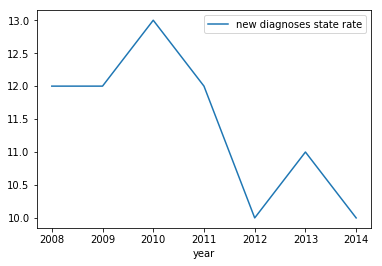

In [109]:
to_timeseries('new diagnoses state rate', 'Connecticut', 2008, 2014).plot(x='year', y='new diagnoses state rate')

## Test with some more examples.

In [110]:
for c in newdx_dfs[2014]['county'].columns:
    print(c)

geo id
year
state abbreviation
state
county name
new diagnoses rate
new diagnoses rate stability
new diagnoses cases
2013 nchs urbanicity code


time_series:
Empty DataFrame
Columns: [year, new diagnoses cases]
Index: []
dy = 2008 and loc_header = county name
dy = 2009 and loc_header = county name
dy = 2010 and loc_header = county name
dy = 2011 and loc_header = county name
dy = 2012 and loc_header = county name
dy = 2013 and loc_header = county name
dy = 2014 and loc_header = county name
dy = 2015 and loc_header = county name


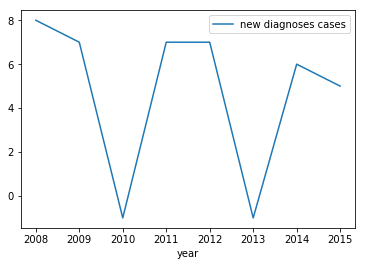

In [135]:
# Time series for 'new diagnoses cases' from 2008 to 2015 in Hartford County
to_timeseries('new diagnoses cases', 'Autauga County', 2008, 2015).plot(x='year', y='new diagnoses cases')